In [9]:
knitr::knit(text='{r}load(url("https://githubusercontent.com/laisbaroni/CEFET/master/DataMining/Trabalho/covtype.csv"))')

[1] "{r}load(url(\"https://githubusercontent.com/laisbaroni/CEFET/master/DataMining/Trabalho/covtype.csv\"))"

In [10]:
loadlibrary <- function(x) {
  if (!require(x,character.only = TRUE))
  { install.packages(x, repos='http://cran.us.r-project.org', dep=TRUE) 
    if(!require(x,character.only = TRUE)) 
      stop("Package not found") } }

In [14]:
loadlibrary("RCurl")

In [48]:
mydata=read.csv(url("https://github.com/laisbaroni/CEFET/raw/master/DataMining/Trabalho/covtype.csv"))

In [51]:
head(mydata,15)

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


# Análise Exploratória

Legenda dos Plots

In [52]:
covertype <- c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz")
color_covertype <- c("orangered", "lightblue", "pink", "grey", "green", "yellow", "purple")

ERROR: Error in strwidth(legend, units = "user", cex = cex, font = text.font): plot.new has not been called yet


Gráfico em Barras de frequências para a "cover"

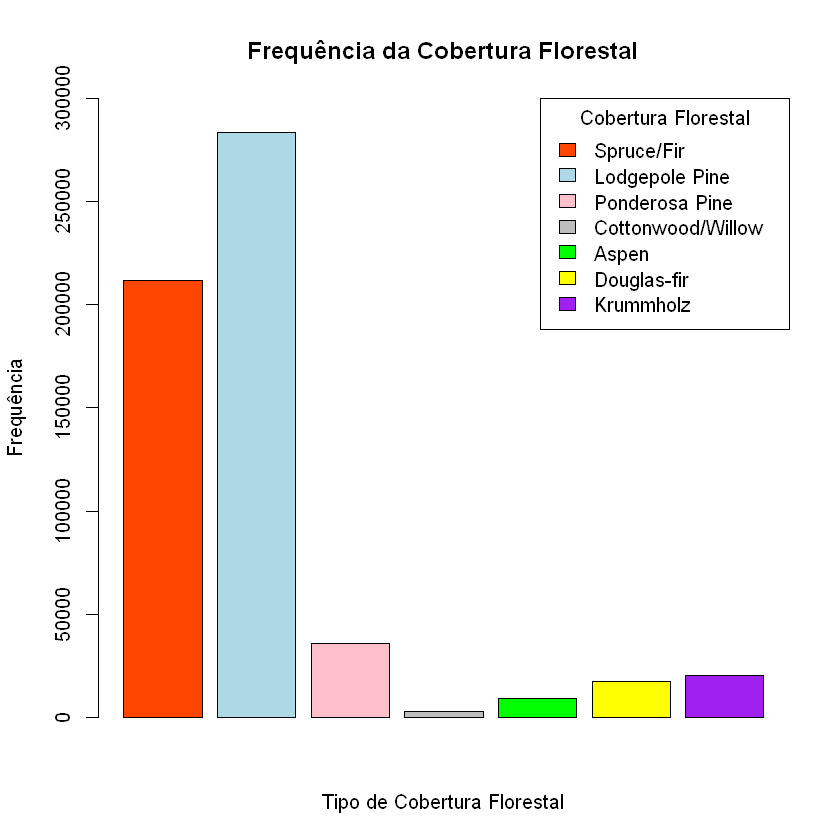

In [43]:
#barplot(mydata$Cover_Type, main= "Histograma da Cobertura Florestal", col={"gray"}, xlab="Tipo de Cobertura Florestal", ylab="Frequência", labels=TRUE, breaks=8, ylim=c(0, 530000))
barplot(table(mydata$Cover_Type), main= "Frequência da Cobertura Florestal", col=color_covertype, xlab="Tipo de Cobertura Florestal", ylab="Frequência", ylim=c(0,300000), axisnames=FALSE)
legend("topright", covertype, fill=color_covertype, title="Cobertura Florestal")

Gráfico pareado (comparação de variáveis 2 a 2)

Subset do dataset (apenas um amostra de 100 valores para os atributos de interesse)

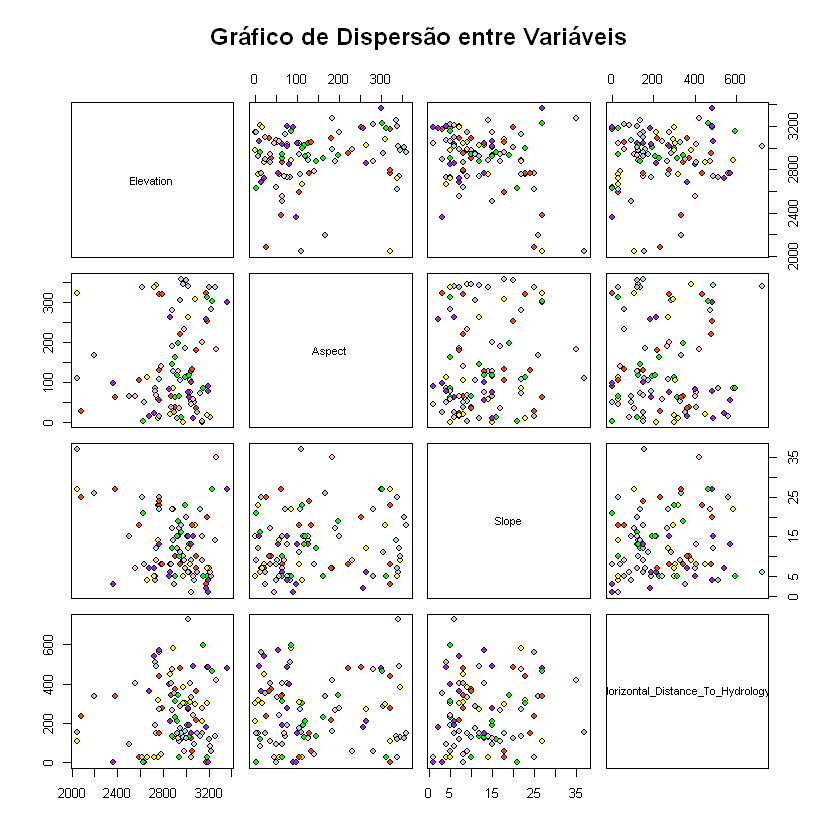

In [53]:
mydata2<-mydata[,c(1, 2, 3, 4)]
mydata2<-mydata2[sample(1:nrow(mydata2),100,replace=F),]
pairs(mydata2, main = "Gráfico de Dispersão entre Variáveis", pch = 21, bg = c("orangered", "lightblue", "pink", "grey", "green", "yellow", "purple"))

Boxplot

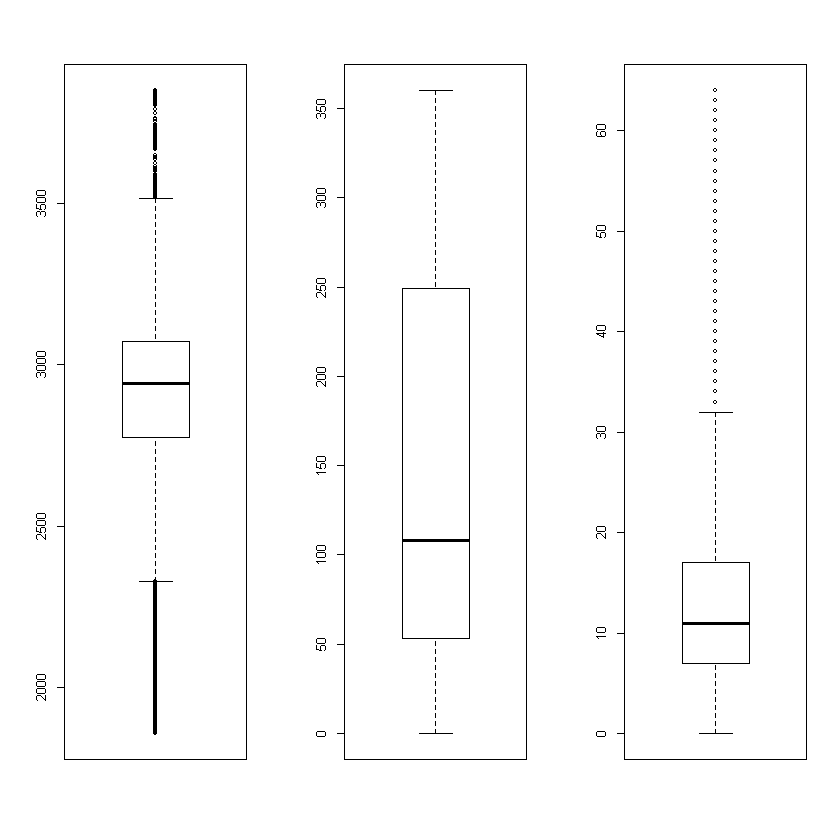

In [54]:
par(mfrow=c(1,3))
boxplot(mydata$Elevation)
boxplot(mydata$Aspect)
boxplot(mydata$Slope)

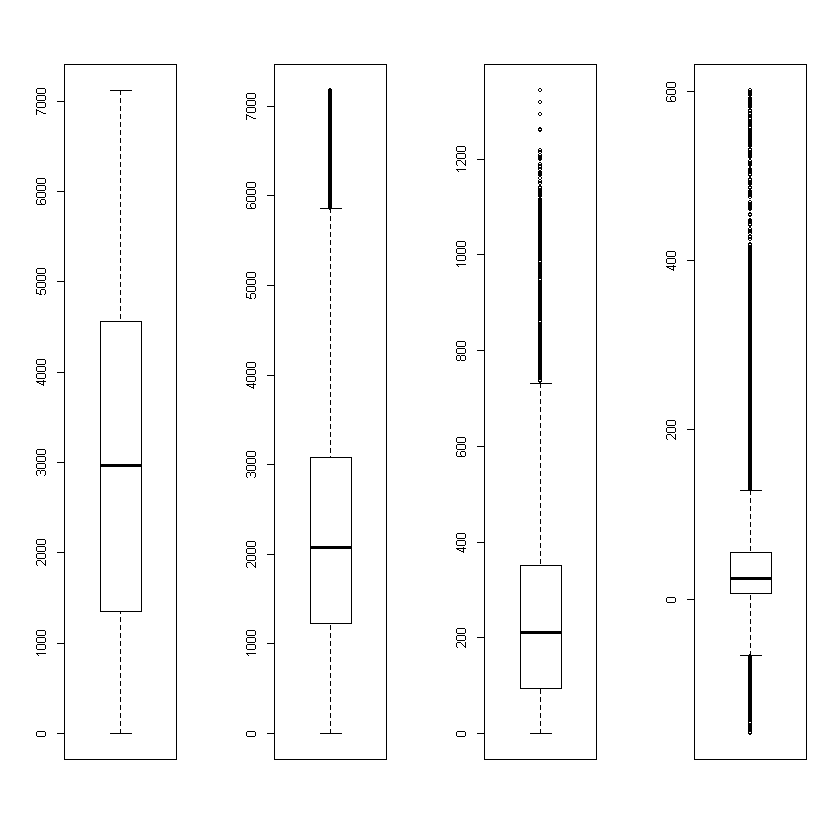

In [55]:
par(mfrow=c(1,4))
boxplot(mydata$Horizontal_Distance_To_Roadways)
boxplot(mydata$Horizontal_Distance_To_Fire_Points)
boxplot(mydata$Horizontal_Distance_To_Hydrology)
boxplot(mydata$Vertical_Distance_To_Hydrology)

Mapa de Calor

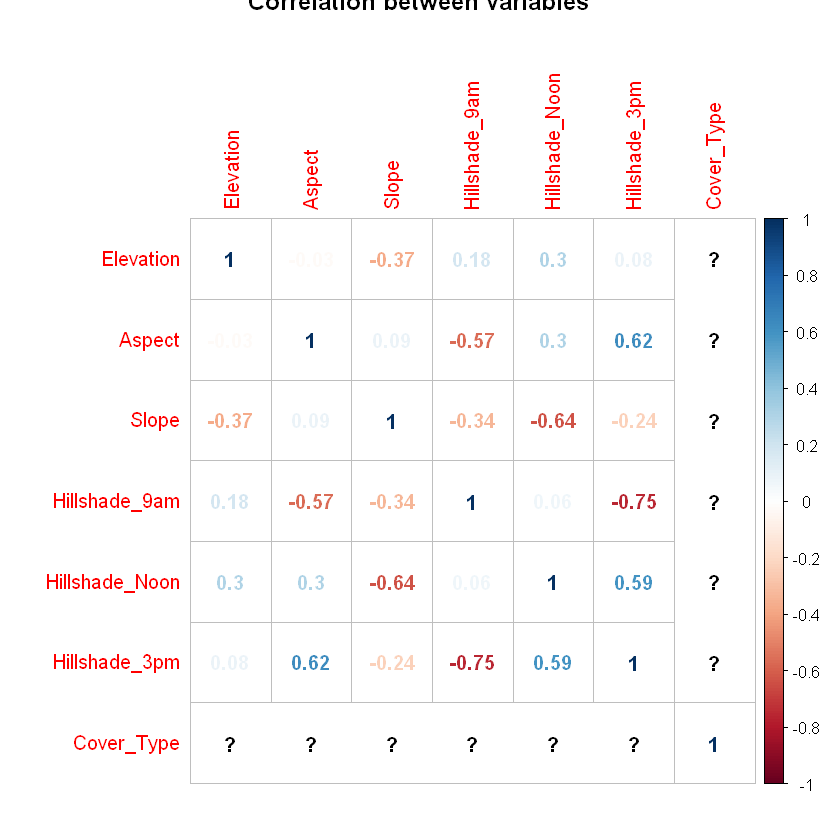

In [56]:
library(corrplot)
M <- cor(mydata[,c(1, 2, 3, 7, 8, 9, 55)]) # get correlations
corrplot(M, method = "number", main="Correlation between variables") #plot matrix

# Preprocessamento

## Categorização

Categorização com intervalos equidistantes

In [17]:
library(arules)
mydata$Elevation <- discretize(mydata$Elevation,categories = 15)
mydata$Aspect <- discretize(mydata$Aspect,categories = 15)
mydata$Slope <- discretize(mydata$Slope,categories = 15)
mydata$Horizontal_Distance_To_Hydrology <- discretize(mydata$Horizontal_Distance_To_Hydrology,categories = 15)
mydata$Vertical_Distance_To_Hydrology <- discretize(mydata$Vertical_Distance_To_Hydrology,categories = 15)
mydata$Horizontal_Distance_To_Roadways <- discretize(mydata$Horizontal_Distance_To_Roadways,categories = 15)
mydata$Hillshade_Noon <- discretize(mydata$Hillshade_Noon,categories = 15)
mydata$Horizontal_Distance_To_Fire_Points <- discretize(mydata$Horizontal_Distance_To_Fire_Points,categories = 15)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



Gráficos das variáveis categorizadas

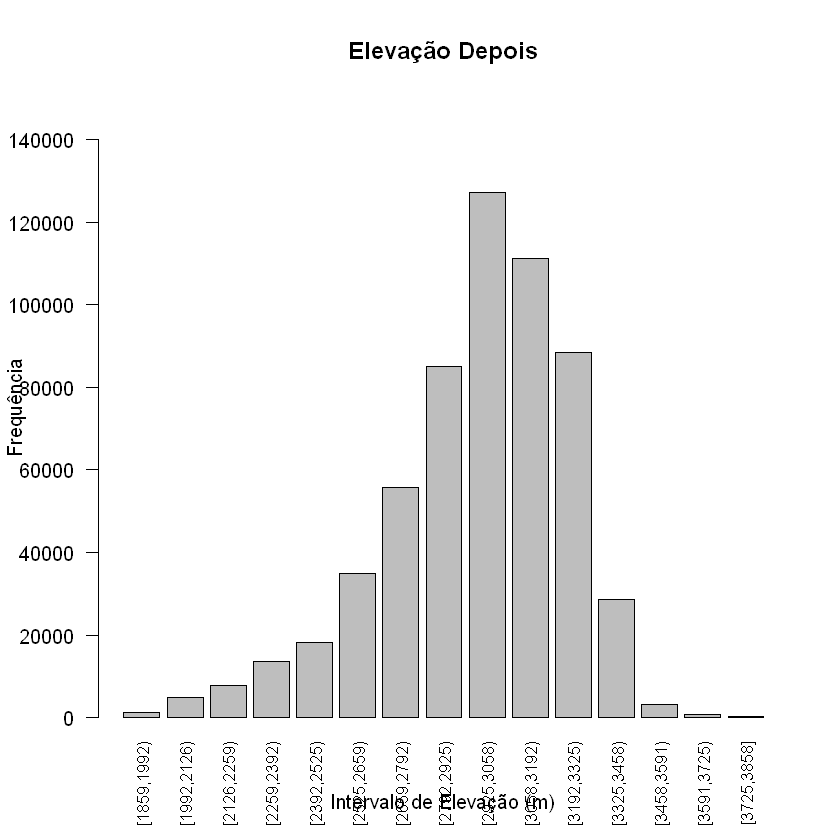

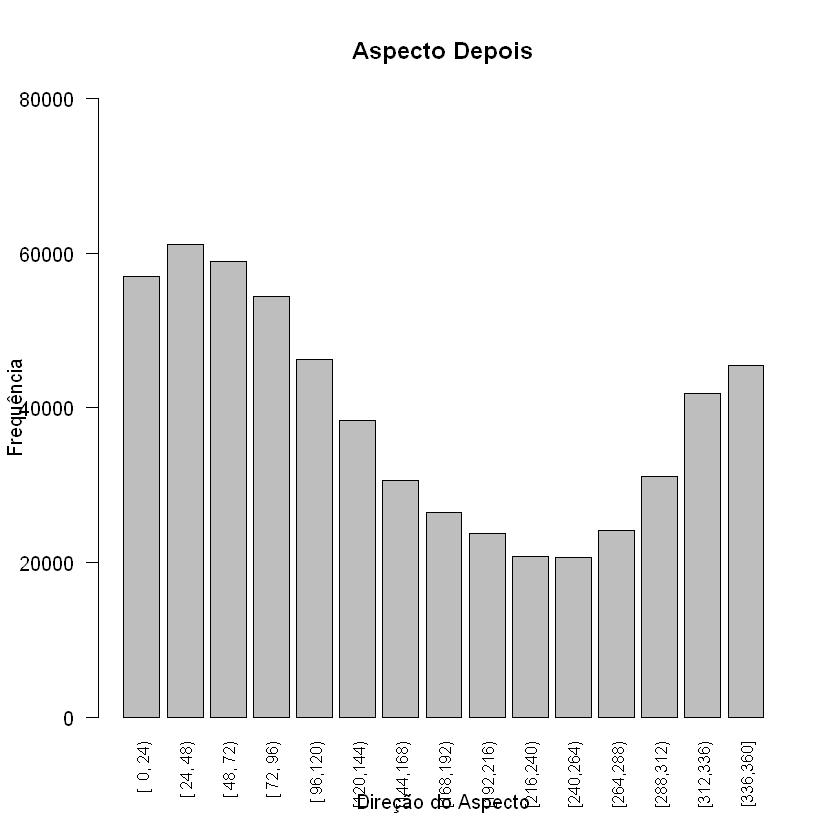

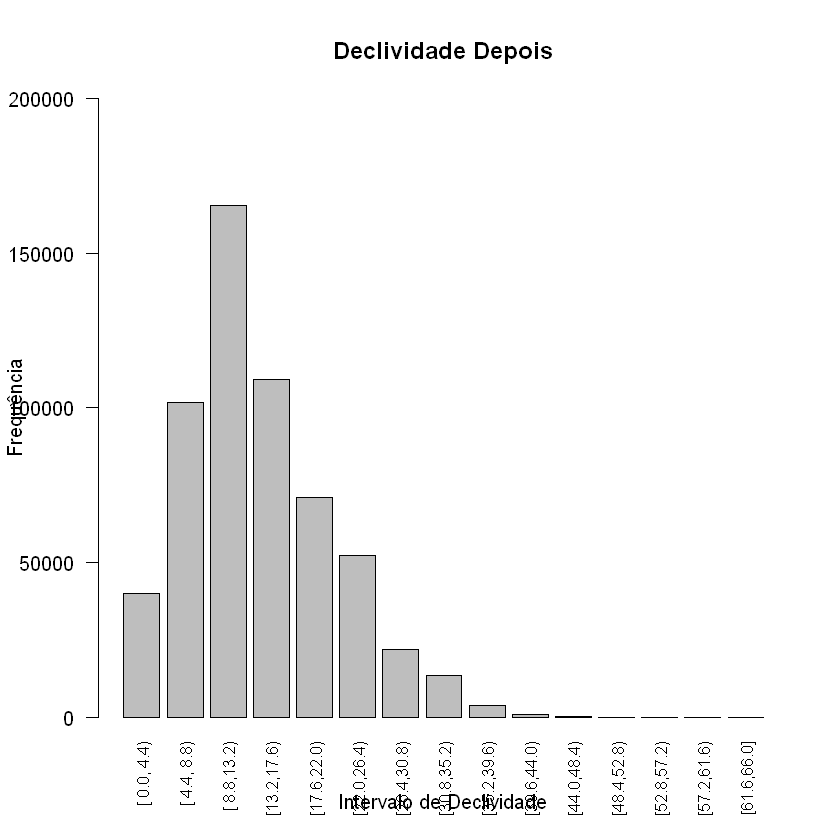

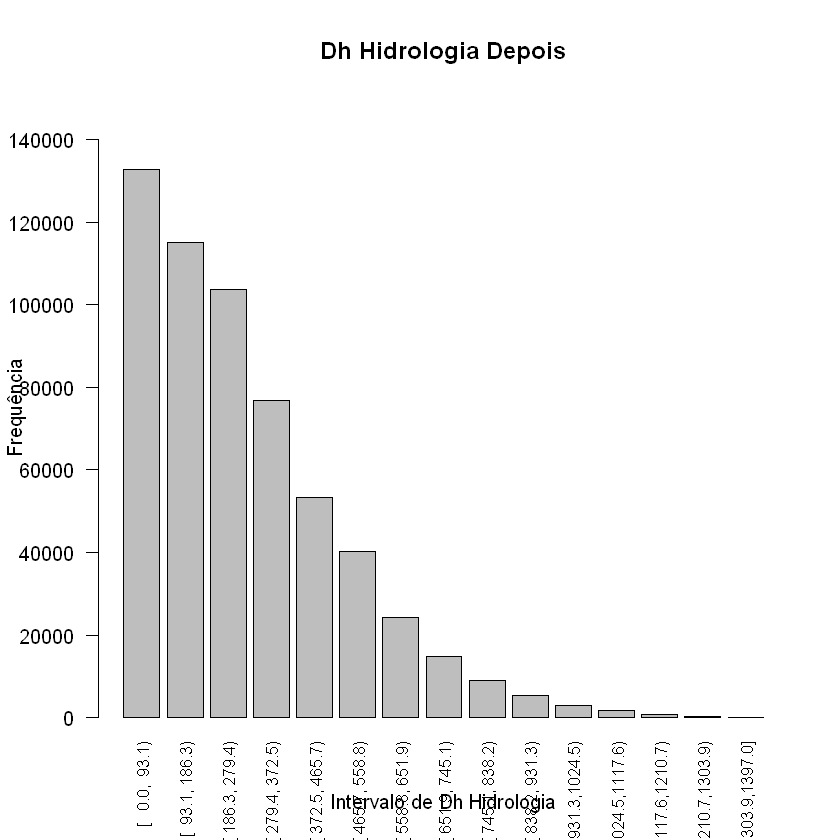

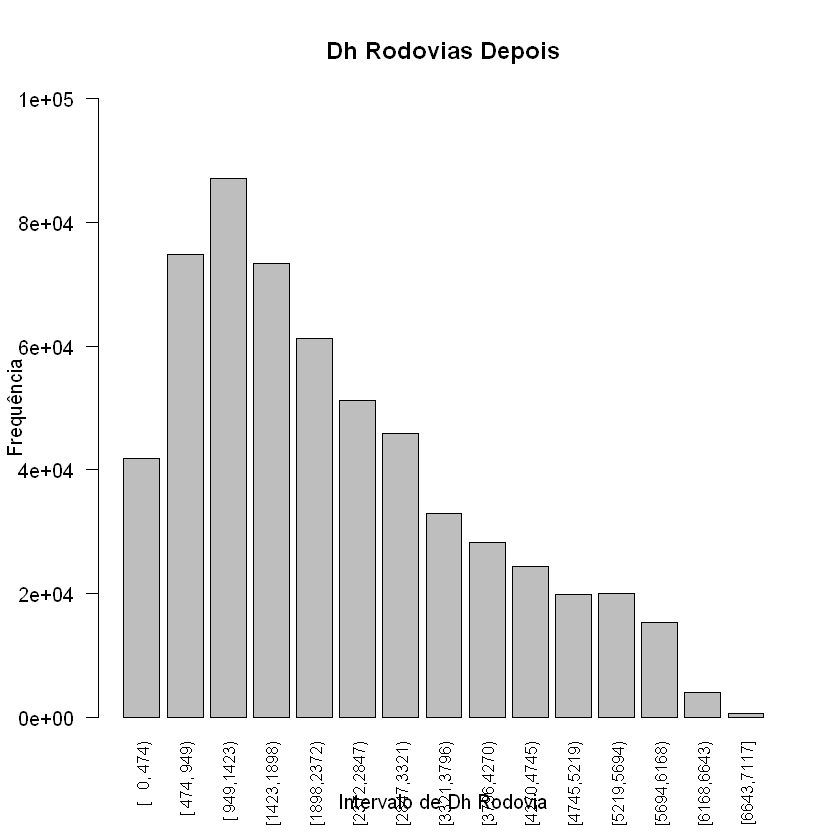

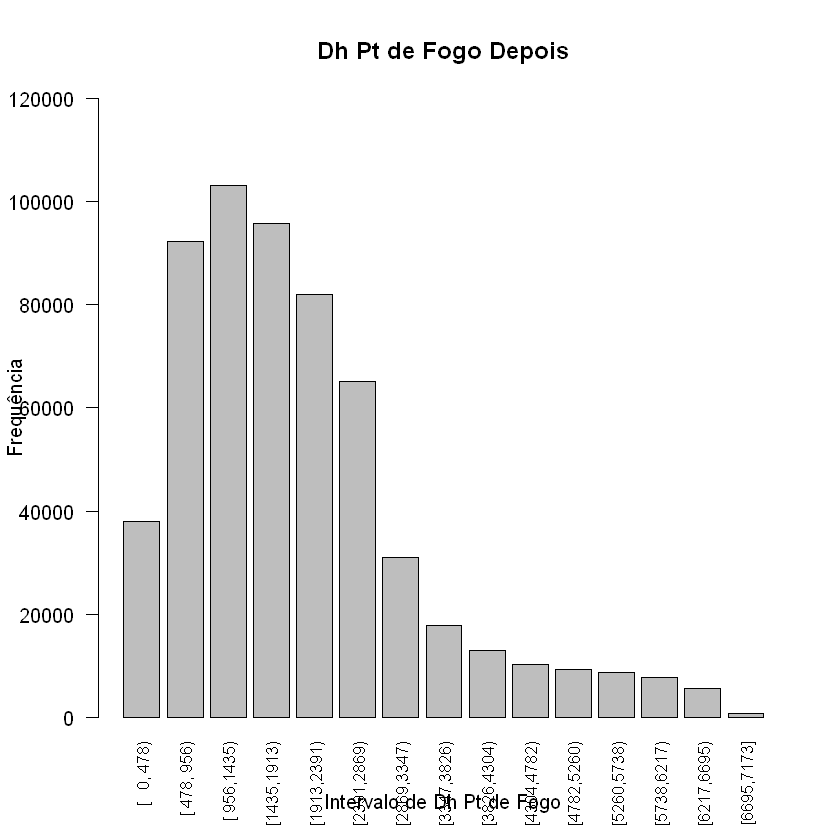

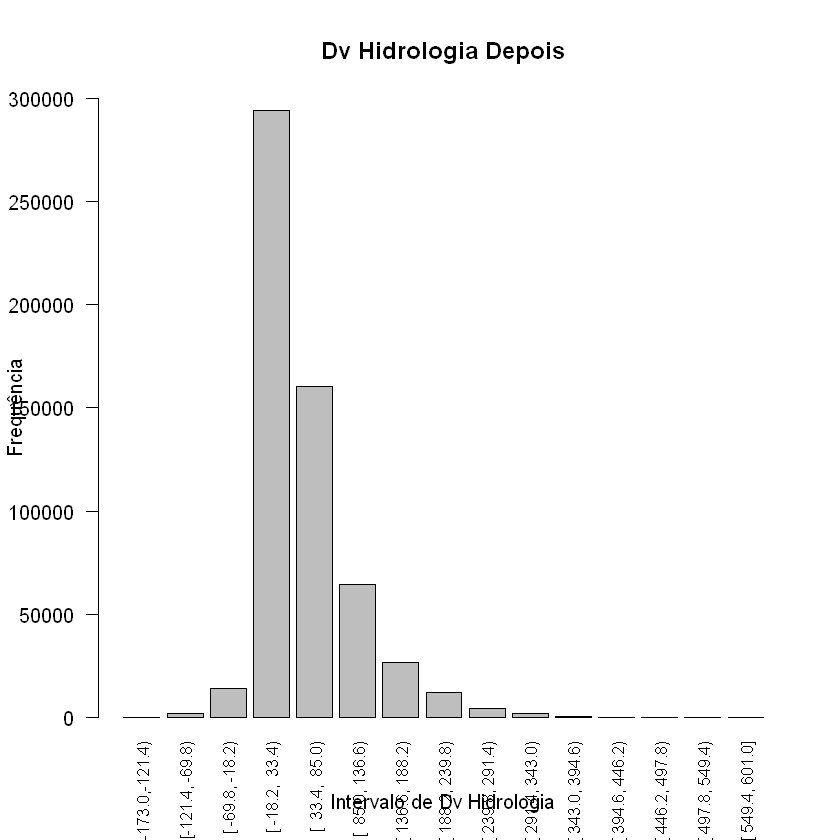

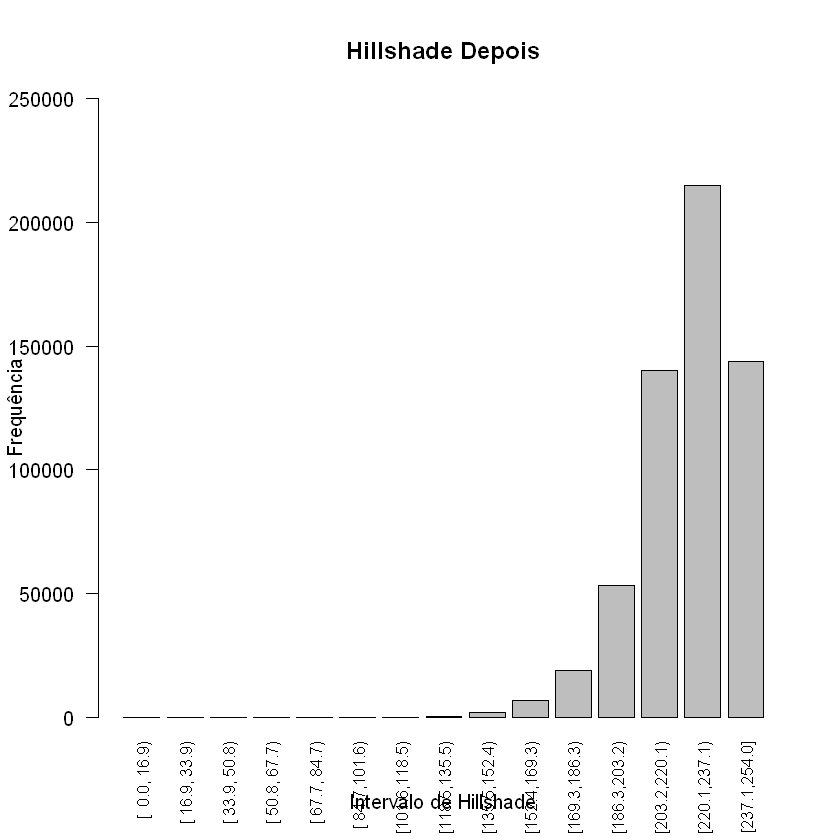

In [20]:
barplot(table(mydata$Elevation),  main= "Elevação Depois", col={"gray"}, xlab="Intervalo de Elevação (m)", ylab="Frequência", ylim=c(0, 150000), cex.names = 0.8, las=2)
barplot(table(mydata$Aspect),  main= "Aspecto Depois", col={"gray"}, xlab="Direção do Aspecto", ylab="Frequência", ylim=c(0, 80000), cex.names = 0.8, las=2)
barplot(table(mydata$Slope),  main= "Declividade Depois", col={"gray"}, xlab="Intervalo de Declividade", ylab="Frequência", ylim=c(0, 200000), cex.names = 0.8, las=2)
barplot(table(mydata$Horizontal_Distance_To_Hydrology),  main= "Dh Hidrologia Depois", col={"gray"}, xlab="Intervalo de Dh Hidrologia", ylab="Frequência", ylim=c(0, 150000), cex.names = 0.8, las=2)
barplot(table(mydata$Horizontal_Distance_To_Roadways),  main= "Dh Rodovias Depois", col={"gray"}, xlab="Intervalo de Dh Rodovia", ylab="Frequência", ylim=c(0, 100000), cex.names = 0.8, las=2)
barplot(table(mydata$Horizontal_Distance_To_Fire_Points),  main= "Dh Pt de Fogo Depois", col={"gray"}, xlab="Intervalo de Dh Pt de Fogo", ylab="Frequência", ylim=c(0, 120000), cex.names = 0.8, las=2)
barplot(table(mydata$Vertical_Distance_To_Hydrology),  main= "Dv Hidrologia Depois", col={"gray"}, xlab="Intervalo de Dv Hidrologia", ylab="Frequência", ylim=c(0, 300000), cex.names = 0.8, las=2)
barplot(table(mydata$Hillshade_Noon),  main= "Hillshade Depois", col={"gray"}, xlab="Intervalo de Hillshade", ylab="Frequência", ylim=c(0, 250000), , cex.names = 0.8, las=2)

## Construção de Atributos

As tabelas soil_type de 1 a 40 precisam ser juntadas, assim como as tabelas wildeness_area de 1 a 4

fazendo nova coluna com as "wilderness areas" juntas

In [22]:
library(plyr)
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:arules':

    intersect, recode, setdiff, setequal, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'tidyr'

The following object is masked from 'package:Matrix':

    expand

The following object is masked from 'package:RCurl':

    complete



In [23]:
mydata <- mydata %>% 
      gather(key=wilderness_area, value=area.indicator, Wilderness_Area1:Wilderness_Area4) %>%
      filter(area.indicator == 1 ) %>%
      select(-area.indicator)

Renomeando as áreas

In [24]:
mydata$wilderness_area <- ifelse(mydata$wilderness_area=="Wilderness_Area1","Rawah",
                       ifelse(mydata$wilderness_area=="Wilderness_Area2","Neota",
                       ifelse(mydata$wilderness_area=="Wilderness_Area3","Comanche Peak",
                       "Cache la Poudre")))

Gráfico de frequencia de área de preservação

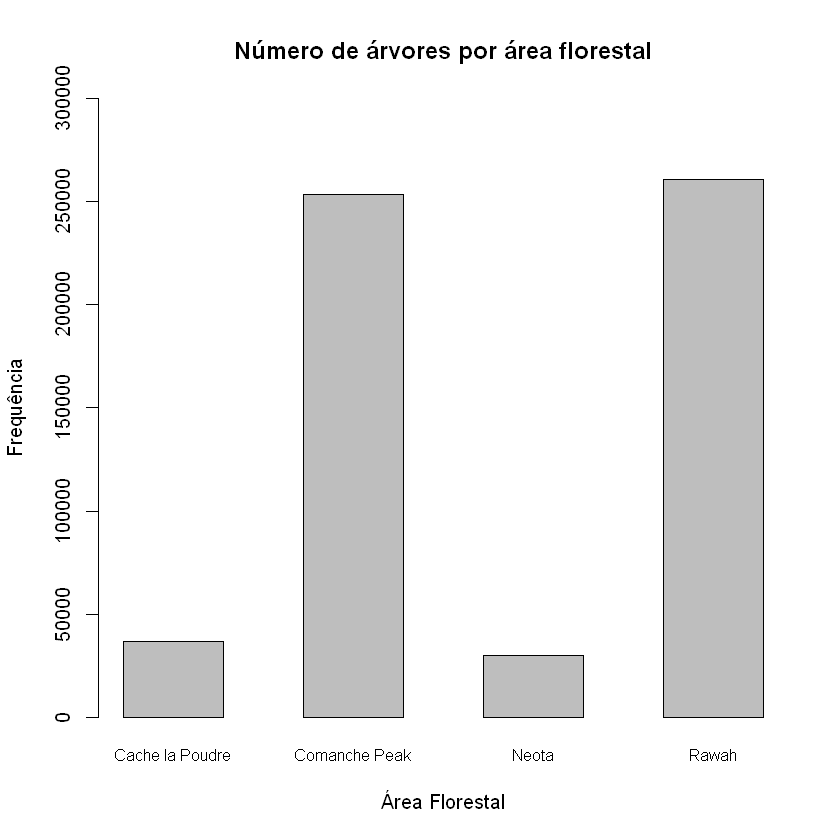

In [25]:
barplot(table(mydata$wilderness_area), ylim=c(0,300000), space=.8, width=c(.2,.2), main="Número de árvores por área florestal", xlab="Área Florestal",  cex.names = 0.8, ylab="Frequência")

fazendo nova coluna com as soil type juntas

In [26]:
mydata <- mydata %>% 
  gather(key=Soil, value=soil.indicator, Soil_Type1:Soil_Type40) %>% 
  filter(soil.indicator == 1 ) %>%
  select(-soil.indicator)

Gráfico de Frequências dos Tipos de Solo

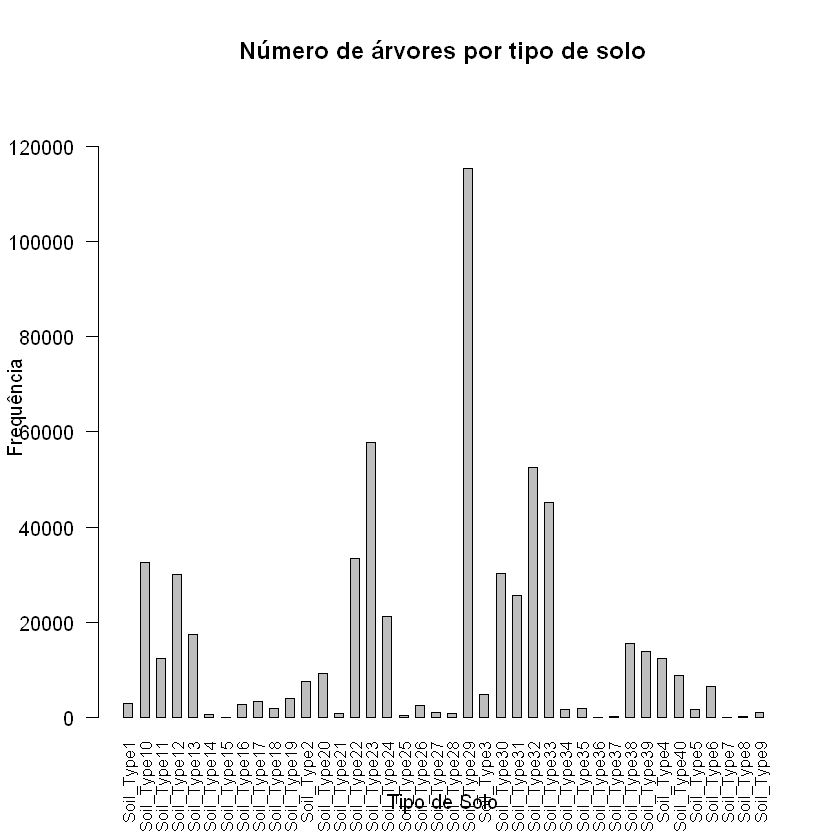

In [27]:
barplot(table(mydata$Soil), ylim=c(0,130000), space=.8, width=c(.2,.2), main="Número de árvores por tipo de solo", xlab="Tipo de Solo", ylab="Frequência",  cex.names = 0.8, las=2)

## Seleção de Atributos

Escolha das colunas de interesse (descartando hillshade 9am e 3pm)

In [28]:
mydata <- mydata[,c(1:6,8,10:13)]

# Classificação

Separando as parcelas para teste (20%) e treinamento (80%)

In [29]:
n <- 581012  #total de linhas no dataset
m <- trunc(n*0.2) #20%
a <- sample(1:n,m)  #escolhendo aleatoriamente 20%
test <- mydata[a,] #parte para teste
nb <- mydata[-a,] # parte para treinamento Naive Bayes
rf <- mydata[-a,] # parte para treinamento Random Forest

Separando gabarito da camada test

In [30]:
gabarito <- test$Cover_Type

## Naive Bayes

Separando o rótulo do treinamento e transformando-o em "character"

In [31]:
rotulo <- nb$Cover_Type
rotulo <- as.character(rotulo)

Criando o modelo Naive Bayes

In [32]:
library(naivebayes)
nbmodel <- naive_bayes(nb[,-9], rotulo, laplace=c(0.3646, 0.4875, 0.06160, 0.00477, 0.0164, 0.0298, 0.03530))

Classificando a camada teste

In [33]:
nb_pred <- predict(nbmodel, test[,-9])

Verificando o resultado  - matriz de confusão

In [34]:
nb_matriz.confusao <- table(gabarito, nb_pred)
nb_perc.acerto <- 100*(nb_matriz.confusao[1,1]+nb_matriz.confusao[2,2]+nb_matriz.confusao[3,3]+nb_matriz.confusao[4,4]+nb_matriz.confusao[5,5]+nb_matriz.confusao[6,6]+ nb_matriz.confusao[7,7])/116202
nb_perc.erro <- 100-nb_perc.acerto
nb_matriz.confusao
nb_perc.acerto
nb_perc.erro

        nb_pred
gabarito     1     2     3     4     5     6     7
       1 28281 11256    13     0   171    30  2715
       2 11591 41372  1078     4  1309  1169   237
       3     0   563  5082   267    84  1103     0
       4     0     0   195   338     0    46     0
       5    39  1179    64     0   555    37     0
       6     0   494  1301    56    45  1528     0
       7  1029    49     0     0     4     0  2918

[1] 68.90931

[1] 31.09069

## Random Forest

transformando as variáveis para "factor"

In [36]:
rf$wilderness_area<-as.factor(rf$wilderness_area)
rf$Cover_Type<-as.factor(rf$Cover_Type)
rf$Soil<-as.factor(rf$Soil)
test$wilderness_area<-as.factor(test$wilderness_area)
test$Cover_Type<-as.factor(test$Cover_Type)
test$Soil<-as.factor(test$Soil)

Igualando o "level" de teste com o treino (para rodar o predict)

In [37]:
levels(test$Cover_Type) <- levels(rf$Cover_Type)
levels(test$Elevation) <- levels(rf$Elevation)
levels(test$Aspect) <- levels(rf$Aspect)
levels(test$Slope) <- levels(rf$Slope)
levels(test$Horizontal_Distance_To_Hydrology) <- levels(rf$Horizontal_Distance_To_Hydrology)
levels(test$Horizontal_Distance_To_Roadways) <- levels(rf$Horizontal_Distance_To_Roadways)
levels(test$Horizontal_Distance_To_Fire_Points) <- levels(rf$Horizontal_Distance_To_Fire_Points)
levels(test$Vertical_Distance_To_Hydrology) <- levels(rf$Vertical_Distance_To_Hydrology)
levels(test$Soil) <- levels(rf$Soil)
levels(test$wilderness_area) <- levels(rf$wilderness_area)
levels(test$Hillshade_Noon) <- levels(rf$Hillshade_Noon)

Criando o modelo Random Forest

In [ ]:
library(randomForest)

In [ ]:
rfmodel <- randomForest(as.factor(Cover_Type) ~., data=rf, importance=TRUE, ntree=50)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine



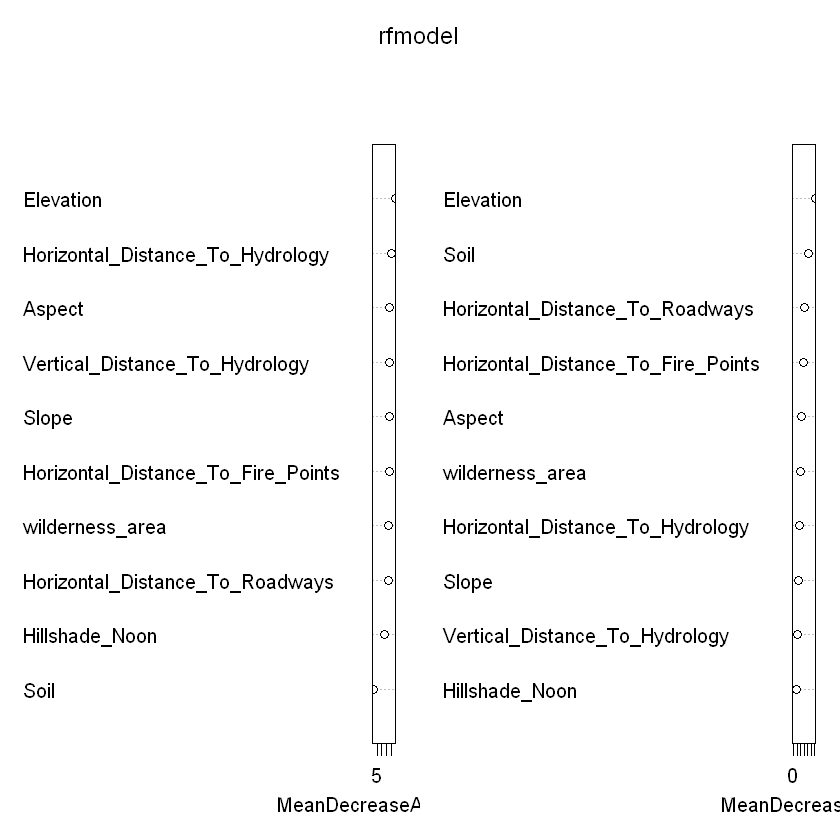

In [38]:
varImpPlot(rfmodel)

Classificando a camada teste

In [39]:
rf_pred <- predict(rfmodel, test)

Verificando o resultado  - matriz de confusão

In [40]:
rf_matriz.confusao <- table(gabarito, rf_pred)
rf_perc.acerto <- 100*(rf_matriz.confusao[1,1]+rf_matriz.confusao[2,2]+rf_matriz.confusao[3,3]+rf_matriz.confusao[4,4]+rf_matriz.confusao[5,5]+rf_matriz.confusao[6,6]+ rf_matriz.confusao[7,7])/116202
rf_perc.erro <- 100-rf_perc.acerto
rf_matriz.confusao
rf_perc.acerto
rf_perc.erro

        rf_pred
gabarito     1     2     3     4     5     6     7
       1 34391  7964     0     0     0     2   109
       2  7491 48726   340     1     4   171    27
       3     4  1748  4967   100     0   280     0
       4     0     0   175   384     0    20     0
       5    21  1751     4     0    95     3     0
       6     4   875   998    35     0  1512     0
       7  1953    79     0     0     1     0  1967

[1] 79.20862

[1] 20.79138

OBS.: os valores percentuais de acerto para os dois métodos vai variar um pouco sempre que rodar o algoritmo, pois os dados para teste e para treinamento são escolhidos aleatoriamente